# Assignment 4

## Objective of this assignment
The objective of this exercise is to understand how the unsupervised learning methods $k$-means clustering and hierarchical clustering work. Upon completing the exercise you should also understand how the choice of number of clusters, distance metrics and linkage functions can impact the solutions obtained and further be able to interpret dendrograms and measures of cluster validity

## ** Important: ** When handing in your homework:
+ Hand in the notebook (and nothing else) named as follows: StudentName1_snumber_StudentName2_snumber.ipynb
+ Provide clear and complete answers to the questions below under a separate header (not hidden somewhere in your source code), and make sure to explain your answers / motivate your choices. Add Markdown cells where necessary.
+ Source code, output graphs, derivations, etc., should be included in the notebook.
+ Hand-in: upload to Blackboard.
+ Include name, student number, assignment (especially in filenames)!
+ When working in pairs only one of you should upload the assignment, and report the name of your partner in your filename.
+ For problems or questions: use the BB discussion board or email the student assistants.


## Advised Reading and Exercise Material
**The following reading material is recommended:**

- Pang-Ning Tan, Michael Steinbach, and Vipin Kumar, *Introduction to Data Mining*, section 8.1-8.3 and 8.5.7


## Additional Tools
For this exercise you will need to load the provided *clusterPlot.py* and *clusterVal.py* scripts. 


## Introduction
In previous exercises we considered supervised learning, i.e., we were given both input data **X** and output values **Y**. We now move on to unsupervised learning where we are only provided input data **X**. The aim is here to find common patterns in the data such as groups of observations that are similar in some sense. In this exercise we will consider two clustering approaches for unsupervised learning: *k*-means clustering and hierarchical clustering.


## 4.1 *k*-means clustering
In this part of the exercise we will investigate *k*-means clustering. In *k*-means each of the data points are assigned to the cluster in closest proximity according to some measure of distance between cluster centers and data points. When the distance is given by the squared euclidian distance, the centers are also called centroids. Once the data points have been assigned, each cluster center is updated to be placed at the center of the data points that are assigned to the cluster. This continues iteratively, usually until the assignment of data points to centers no longer changes or until a maximal number of iterations is reached.

> 4.1.1a (1 point) Load the *synth1* data into python using the *loadmat* function. Cluster the data into *K = 4* clusters using the *k*-means algorithm. Make a scatter plot of the data and the clustering using the provided *clusterPlot()* function.
 + *In Python, you can use the function k_means() from the package sklearn.cluster to compute *k*-means clustering.*
 + *Type clusterPlot(X,clusters,centroids,y) to plot the data and the clustering. Don't forget to import the function from the Toolbox folder. If you are unsure about how to use the function, open the .py file in a text editor and take a look at documentation.*


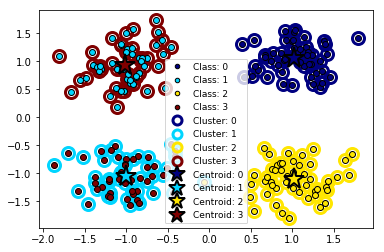

In [40]:
import numpy as np
from scipy import io
from sklearn.cluster import k_means
from Toolbox.clusterPlot import clusterPlot
from Toolbox.clusterVal import clusterVal
import matplotlib.pyplot as plt

def clustp( name, K):
    data=io.loadmat("Data/"+name+".mat")
    X = data['X']
    y = data['y']
    y.ravel()
    kmeans = k_means(X,n_clusters=K)
    clusterPlot(X,kmeans[1],kmeans[0],y)
    plt.show()
clustp("synth1",4)

> 4.1.1b (1 point) Try also to cluster and plot the data sets *synth2*, *synth3*, and *synth4* with the same number of *K*. Does the clustering coincide with the true classes? Explain for every data set. 

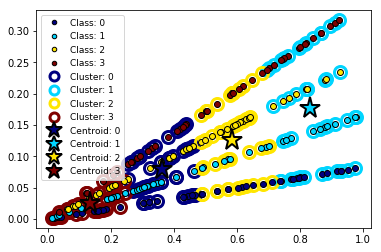

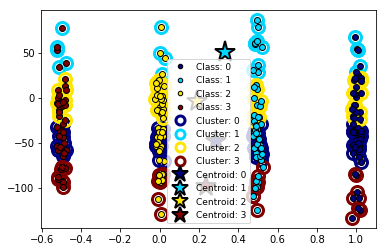

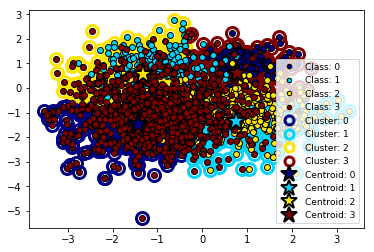

In [34]:
clustp("synth2",4)

clustp("synth3",4)

clustp("synth4",4)

For synth2 the sentroid are spread out in the middle of the dataset and they cluter the data in vertical columns as opposed to the nearly horizontal classes that would be correct.
Fro synt3 for some reason the means are in a vertical line in the middle which means that the data gets sorted by their height which is incorrect because they're spread out in vertical lines horizontaly by class.
For synth4 because of the dense dataset the clustering algorithm has a hard time decideing where to assign the datapoints and has a lot of missclassifications.


Rather than using the error rate we will consider the supervised measures of cluster validity described in *Introduction to Data Mining* section 8.5.7, in particular the entropy, purity, rand statistic, and Jaccard coefficient. Carefully review these measures in the book and make sure you understand how they are calculated.

> 4.1.2a (1 point) Repeat Exercise 4.1.1, but this time perform *k*-means clustering for *K = 1, ..., 10* clusters. For each value of *K* compute the four cluster validity measures mentioned above. Plot the cluster validity measures as a function of *K*
 + *Use the clusterVal() function to compute the cluster validity. Don't forget to import it from the Toolbox folder. If you are unsure about how to use the function, open the .py file in a text editor and take a look at documentation.*

/opt/anaconda3-5.2.0/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


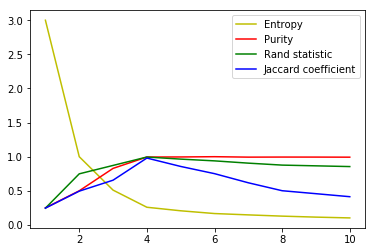

In [42]:
data=io.loadmat("Data/synth1.mat")
X = data['X']
y = data['y']
y.ravel()
entropyl,purityl,rstatl,jaccardl=[],[],[],[]
for K in range(1,11):
    kmeans = k_means(X,n_clusters=K)
    cval=clusterVal(y,kmeans[1])
    entropyl.append(cval[0])
    purityl.append(cval[1])
    rstatl.append(cval[2])
    jaccardl.append(cval[3])

plotErrors(entropyl,purityl,rstatl,jaccardl)    

def plotErrors (entropyl,purityl,rstatl,jaccardl):
    fig=plt.figure()
    ax=fig.add_subplot(111)
    ax.plot(np.array(range(1,11)),np.array(entropyl),c='y', label="Entropy")
    ax.plot(np.array(range(1,11)),np.array(purityl),c='r', label="Purity")
    ax.plot(np.array(range(1,11)),np.array(rstatl),c='g', label="Rand statistic")
    ax.plot(np.array(range(1,11)),np.array(jaccardl),c='b', label="Jaccard coefficient")
    #ax.set_xlabel("Depth")
    #ax.set_ylabel("Error%")
    ax.legend(loc='upper right')
    fig.show()
    

> 4.1.2b (1 point) How can the cluster validity measures be used to select the best number of clusters?
What happens when more than four clusters are used to model the data?

Cluster validity can be used to see if ther is a point in adding aditional classes for the data. From this we cans see after which point the validity stops improoving. In this case the Validities only mariganlly improove after 4 which means that there are most likely only four classes in the data.

*k*-means clustering has many different applications, one of which is data compression. A data set can be compressed by performing *k*-means clustering and then representing each data object by its cluster center. Thus, the only data that need to be stored are the *K* cluster centers and the *N* cluster indices.

> 4.1.3a (1 point) We will consider a subset of the wild faces data described in berg2005[1]. Load the wildfaces data, *Data/wildfaces* using the *loadmat* function. Each data object is a $40 \times 40 \times 3 = 4800$ dimensional vector, corresponding to a 3-color $40 \times 40$ pixels image. Compute a *k*-means clustering of the data with *K = 10* clusters. Plot a few random images from the data set as well as their corresponding cluster centroids to see how they are represented.
+ You can plot an image by the command imshow(np.reshape(X[k,:],(c,x,y)).T) which reshapes an image vector to a 3-dimensional array and plots it. You can plot the cluster centroids in a similar manner.


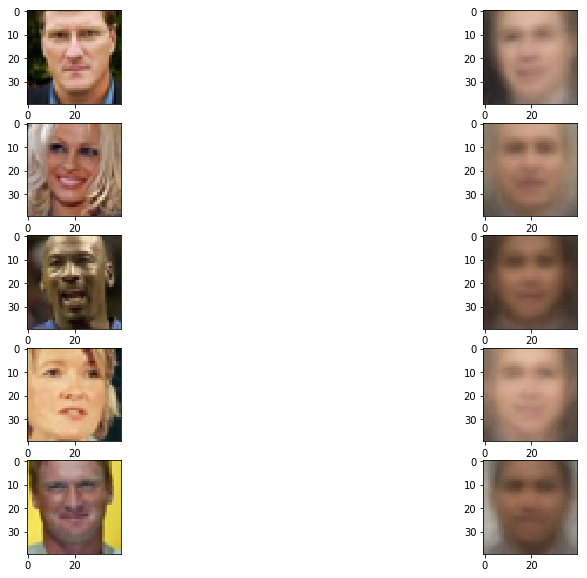

In [94]:
data=io.loadmat("Data/wildfaces.mat")
X = data['X']
K=0
def plotcomp(X,n,cn):
    kmeans = k_means(X,n_clusters=cn)
    labels=kmeans[1]
    centroid=kmeans[0]
    f, axarr = plt.subplots(n,2,figsize=(15,10))
    for K in range(0,n):
        axarr[K,1].imshow(np.reshape(centroid[labels[K]],(3,40,40)).T)
        axarr[K,0].imshow(np.reshape(X[K,:],(3,40,40)).T)
    plt.show()
plotcomp(X,5,10)



> 4.1.3b (1 point) How well is the data represented by the cluster centroids? Are you able to recognize the faces in the compressed representation? What happens if you increase or decrease the number of clusters?

5:


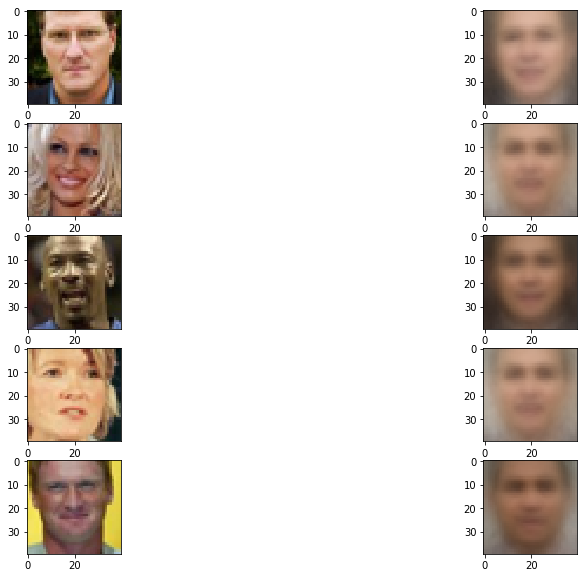





7:


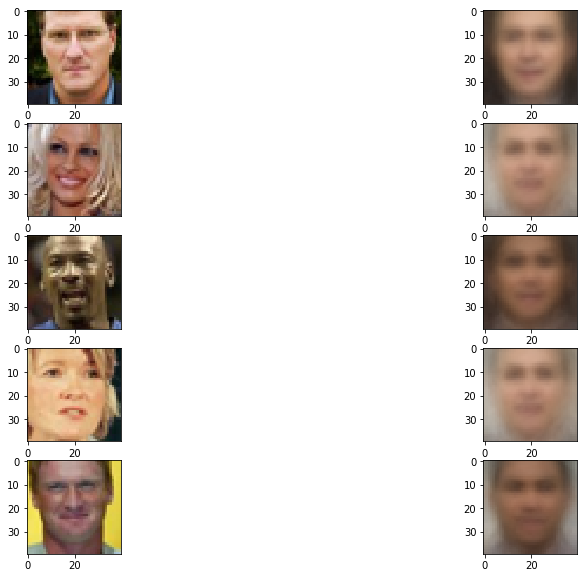





20:


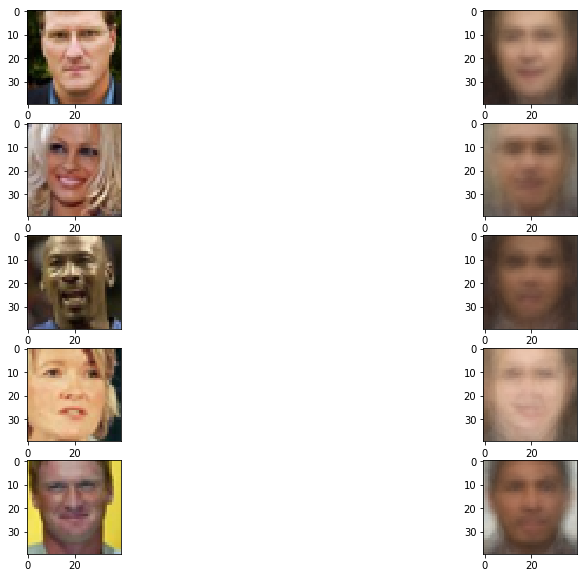





50:


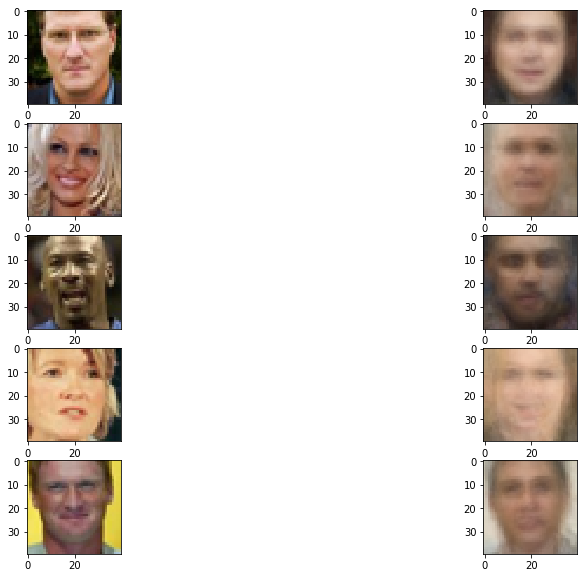

In [95]:
print("5:")
plotcomp(X,5,5)
print("\n\n\n\n7:")
plt.show()
plotcomp(X,5,7)
plt.show()
print("\n\n\n\n20:")
plotcomp(X,5,20)
plt.show()
print("\n\n\n\n50:")
plotcomp(X,5,50)

The cluster representation decresases the data stored making the faces less recognisable the smaller the number of clusters. After 50 or so the more average faces become well recognisable others are generic blurry faces. The more the number of clusters the better recognisable the cluters.

> 4.1.4a (1 point) Repeat the exercise with the digits data set. Load the digits data set from Data/digits. Each data object is a $16 \times 16 = 256$ dimensional vector, corresponding to a gray scale $16 \times 16$ pixels image.
+ You can change the color map to black-on-white gray-scale by adding the parameter cmap=cm.binary to the function imshow().

Number of classes: 10
686	0	4	663	18	14	155	1	12	0	
0	1256	0	0	3	0	5	0	3	2	
9	4	687	14	76	42	9	14	63	11	
6	2	13	2	10	660	4	2	111	14	
1	51	12	2	587	0	12	7	7	173	
21	0	9	9	54	395	122	3	92	11	
66	9	32	35	21	2	665	0	3	1	
0	6	2	0	28	0	0	538	6	212	
3	14	9	7	20	49	6	3	552	45	
0	11	0	1	137	2	0	82	11	577	


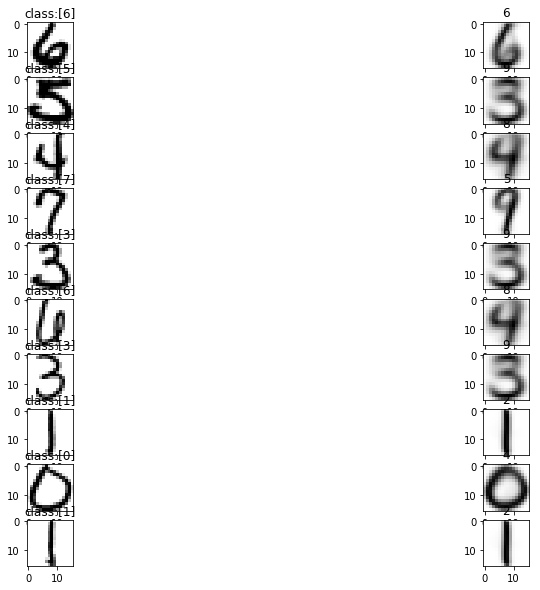

In [130]:
data=io.loadmat("Data/digits.mat")
X = data['X']
y = data['y']
y.ravel()
K=0
def unique(list1):  
    unique_list = []  
    for x in list1: 
        if x not in unique_list: 
            unique_list.append(x)
    return unique_list
def fu(y,labels,s,p):
    w, h = 10, 10;
    mat = [[0 for x in range(w)] for y in range(h)] 
    for i in range(0,y.shape[0]):
        mat[y[i][0]][labels[i]]+=1
    if s:
        for i in range(0,10):
            mi=mat[i].index(max(mat[i]))
            for j in range (0,10):
                mat[j][i],mat[j][mi]=mat[j][mi],mat[j][i]
    if p:
        for i in range(0,10):
            stri=""
            for j in range(0,10):
                stri+=str(mat[i][j])+"\t"
            print (stri)
    return mat
    
def plotcomp(X,y,n,cn):
    kmeans = k_means(X,n_clusters=cn)
    labels=kmeans[1]
    print("Number of classes: "+str(len(unique(labels.flatten().tolist()))))
    centroid=kmeans[0]
    fu(y,labels,True,True)
    f, axarr = plt.subplots(n,2,figsize=(15,10))
    for K in range(0,n,True):
        axarr[K,1].set_title(str(labels[K]))
        axarr[K,1].imshow(np.reshape(centroid[labels[K]],(16,16)),cmap=plt.cm.binary)
        axarr[K,0].set_title("class:"+str(y[K]))
        axarr[K,0].imshow(np.reshape(X[K,:],(16,16)),cmap=plt.cm.binary)
    plt.show()
plotcomp(X,y,10,10)

> 4.1.4b (1 point) Why does running *k*-means with *K = 10* not give you 10 clusters corresponding to the 10 digits *0..9*? How many clusters do you need to visually represent the 10 different digits? Are there any digits that the clustering algorithm seems to confuse more than others and can you explain why?

For me it gives 10 clusters even with K=10. with plotcomp() it is possible to test for other values efficiently. From the above table we can see that the most missclassified digit is 5 (as 3) after witch we have :1 as 4,4 as 9,7as 9 and 3 as 8

## 4.2 Hierarchical Clustering

In this part of the exercie we will consider hierarchical clustering based on the functions from the package *scipy.cluster.hierarchy*. The function *linkage()* forms a sample to sample distance matrix according to a given distance metric, and creates the linkages between data points forming the hierarchical cluster tree. The function *dendrogram* creates a plot of the generated tree. The function *fcluster* extracts the cluster from a linkage matrix w.r.t. a given criterion. Use *help* for the three functions (or read the online documentation) and inspect what distance metrics and linkage functions are implemented.

> 4.2.1a (1 point) Load the data set from *Data/synth1*. Cluster the data using hierarchical clustering with single linkage using the Euclidean distance measure. Cluster the data into 4 clusters by cutting off the dendrogram at a threshold. Plot a dendrogram and a scatter plot of the clusters.
+ The function *linkage()* computes the hierarchical clustering, resulting in a matrix representing the hierarchy of clusterings. Type help(linkage) (or read the online documentation) to learn how to use it.
+ You can e.g. type *Z = linkage(X, method='single', metric='euclidean')* to use single linkage with the Euclidean distance measure.
+ To compute a clustering, you can use the function*fcluster()*. For example, type *cls = fcluster(Z, criterion='maxclust', t=4)* to get a maximum of 4 clusters. Type *help(fcluster)* (or read the online documentation) to learn more about what this function does.
+ To plot a dendrogram, you can use the *dendrogram()* function
+ Again, you can use the function *clusterplot()* to plot a scatter plot of the clustering.

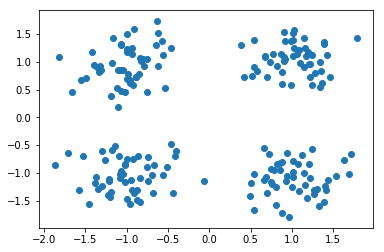

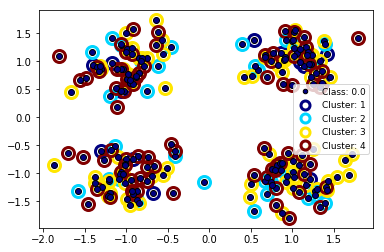

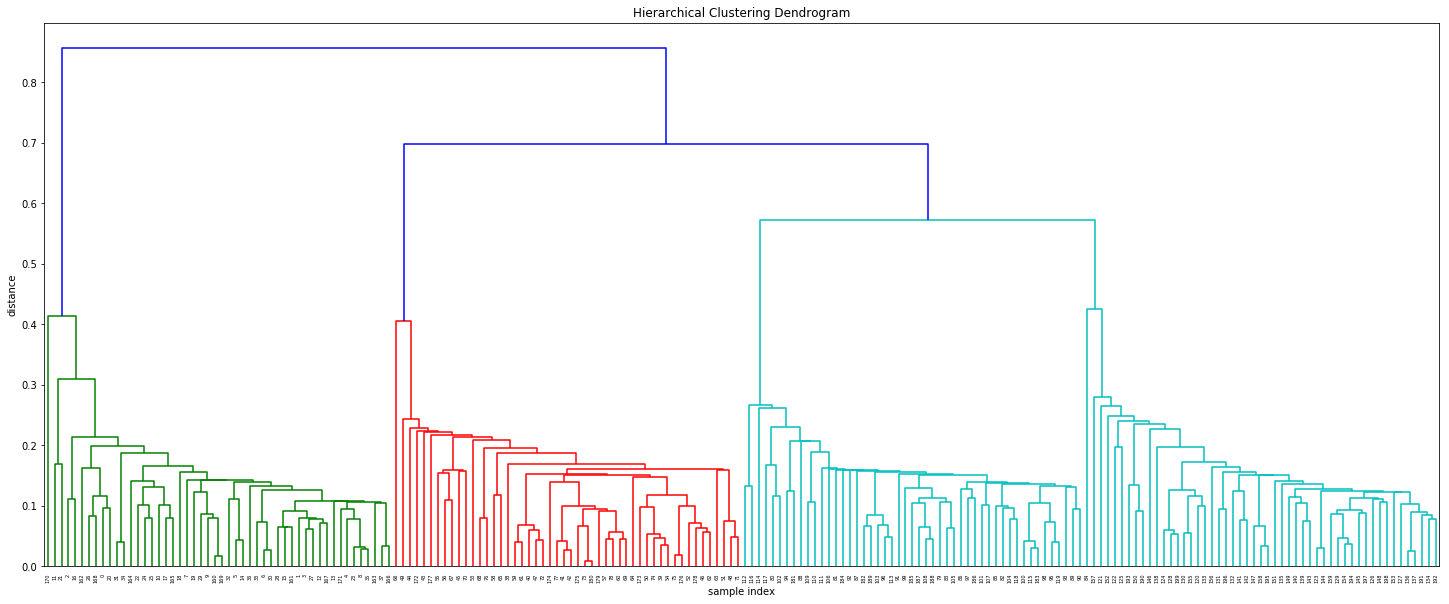

In [3]:
##Answer to question 4.2.1a
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import linkage,fcluster,dendrogram
from Toolbox.clusterPlot import clusterPlot
import numpy as np
from scipy import io, stats
data=io.loadmat("Data/synth1.mat")
X=data['X']
Y=data['y']
plt.scatter(X[:,0], X[:,1])
plt.show()

cls = fcluster(Z, criterion='maxclust', t=4)

clusterPlot(X, cls)
plt.show()

Z=linkage(X,method='single',metric='euclidean')
cls = fcluster(Z, criterion='maxclust', t=4)
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(Z)
plt.show()

> 4.2.1b (1 point) Change the linkage methods (single, complete, average) and explain how this changes the dendrogram.
Then plot a dendrogram and a scatterplot of the clusters for the *synth2*, *synth3*, and *synth4* data sets..

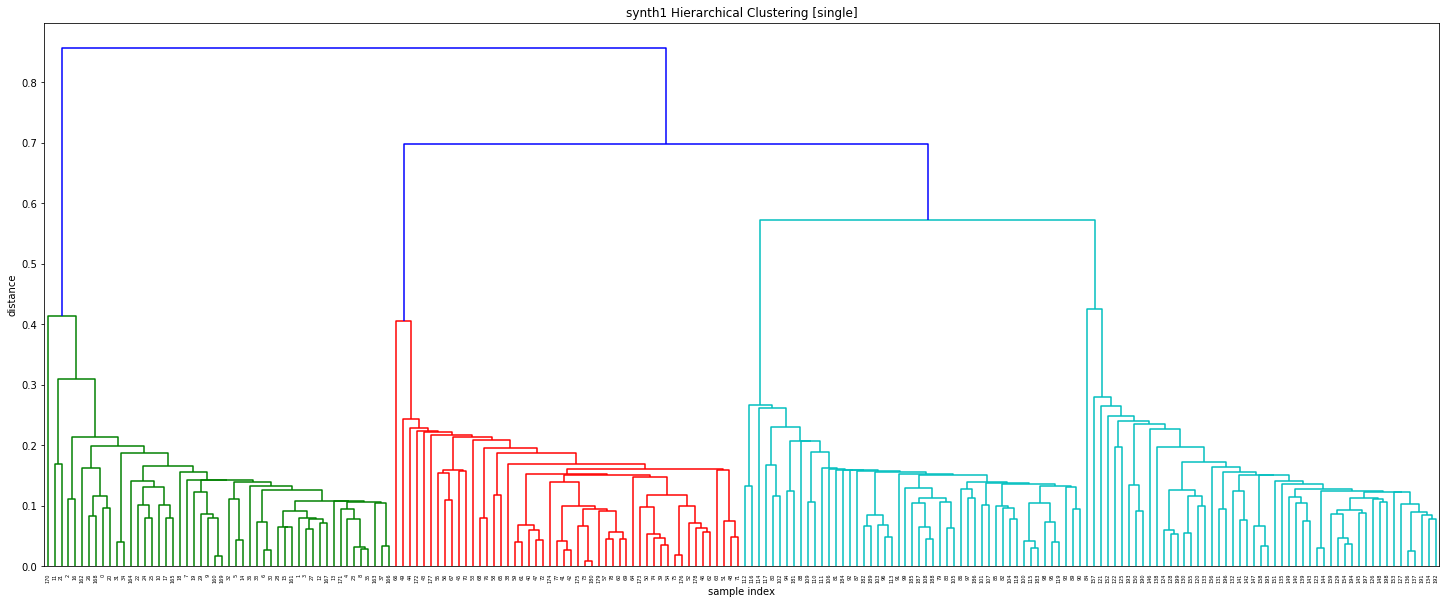

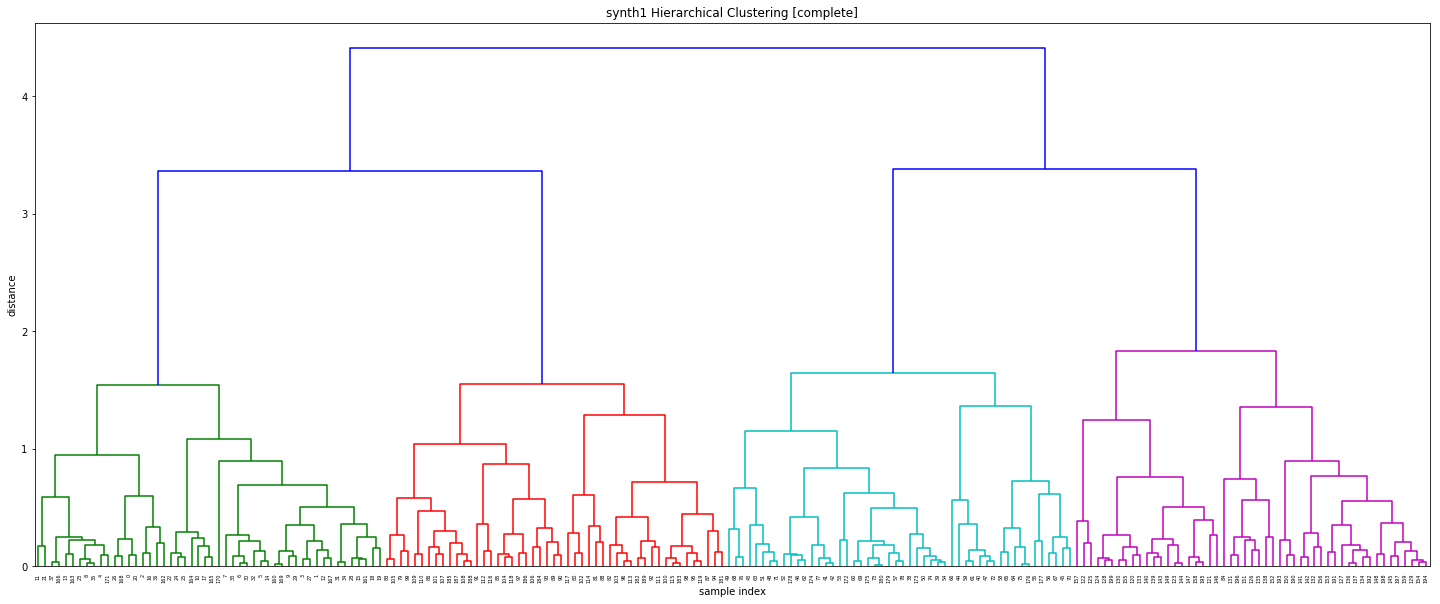

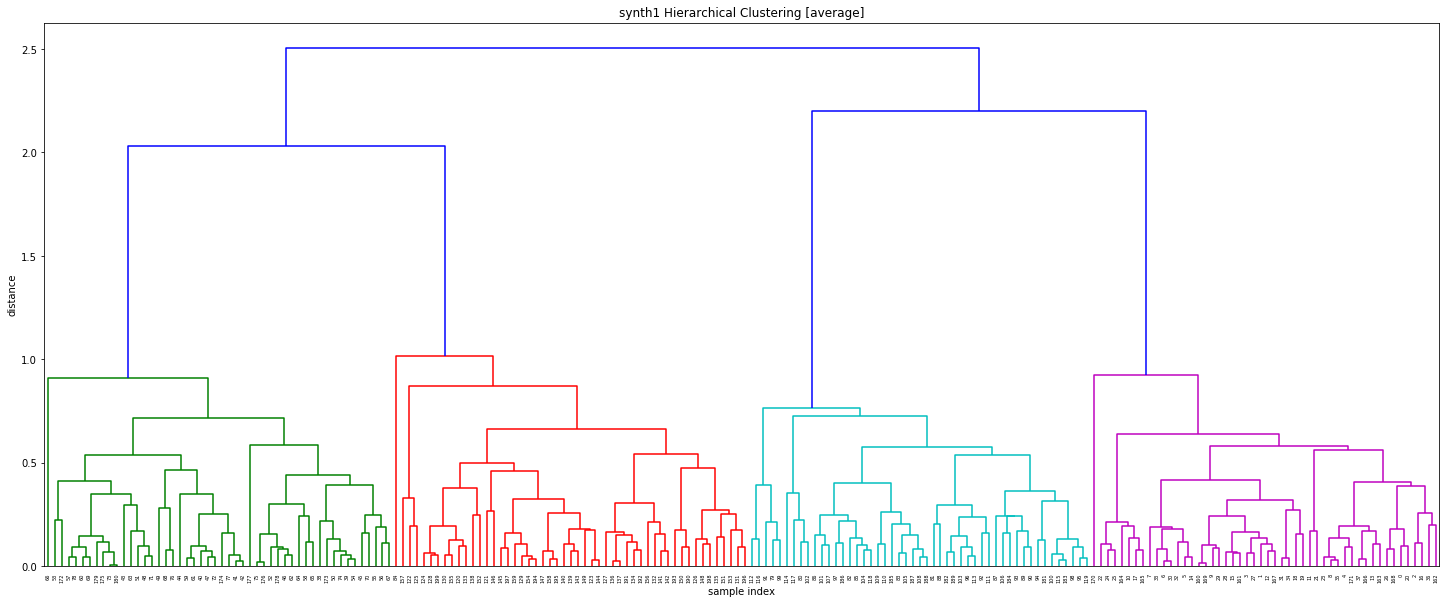

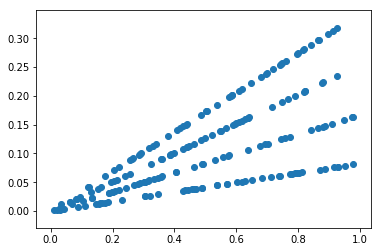

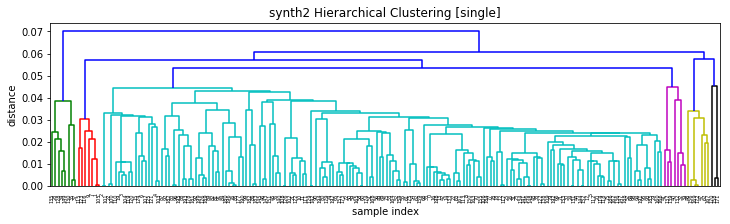

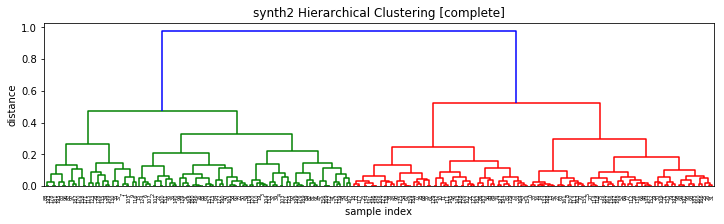

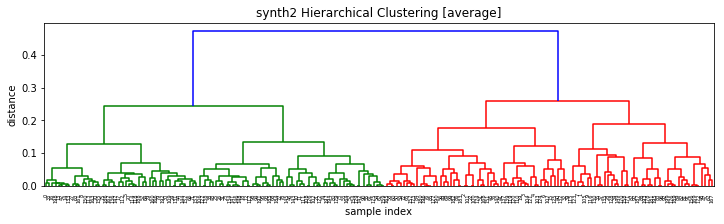

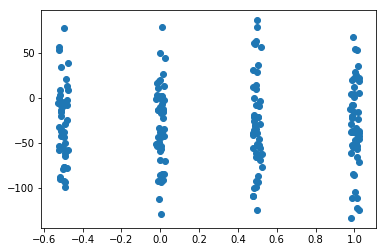

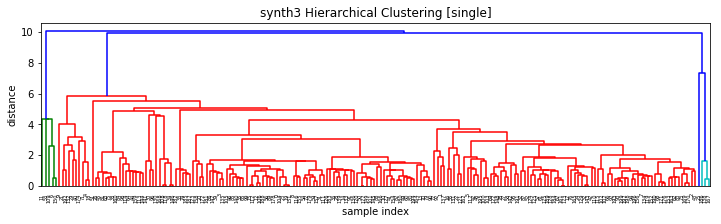

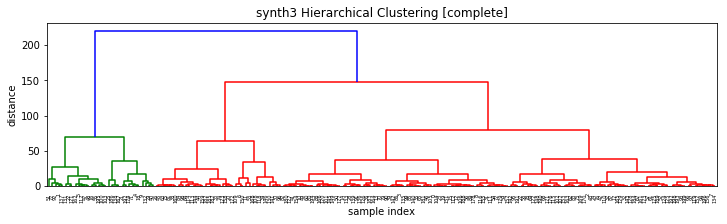

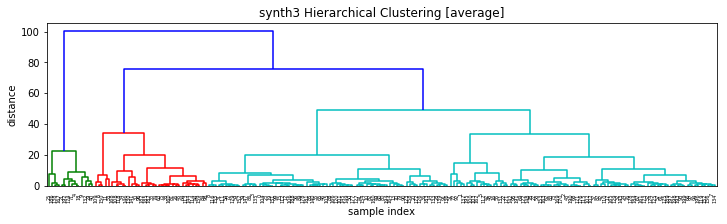

In [2]:
##Answer to question 4.2.1b

arr=['single','complete','average']

for i in range(0,3) :
    Z=linkage(X,method=arr[i],metric='euclidean')
    cls = fcluster(Z, criterion='maxclust', t=4)
    plt.figure(figsize=(25, 10))
    plt.title('synth1 Hierarchical Clustering ['+arr[i]+']')
    plt.xlabel('sample index')
    plt.ylabel('distance')
    dendrogram(Z)
plt.show()

data=io.loadmat("Data/synth2.mat")
X=data['X']
Y=data['y']
plt.scatter(X[:,0], X[:,1])
plt.show()
for i in range(0,3) :
    Z=linkage(X,method=arr[i],metric='euclidean')
    plt.figure(figsize=(12, 3))
    plt.title('synth2 Hierarchical Clustering ['+arr[i]+']')
    plt.xlabel('sample index')
    plt.ylabel('distance')
    dendrogram(Z)

plt.show()

data=io.loadmat("Data/synth3.mat")
X=data['X']
Y=data['y']
plt.scatter(X[:,0], X[:,1])
plt.show()
for i in range(0,3) :
    Z=linkage(X,method=arr[i],metric='euclidean')
    plt.figure(figsize=(12, 3))
    plt.title('synth3 Hierarchical Clustering ['+arr[i]+']')
    plt.xlabel('sample index')
    plt.ylabel('distance')
    dendrogram(Z)

plt.show()

*Double click to type your answer for 4.1.3b here:*
'single' method is based on the two closest points in the different clusters. Dendrogram of it is tend to have trivial roots because it simply clusters closet points. it clusters simply close point, so, it tends to be more sensitive to outlier.
 ‘complete’ method is based on the most distant points. Dendrogram of this method is tend to have small size cluster than ‘single’ method. It is less sensitive to noise but could have too many clusters.
 ‘average’ method is based on the average of clusters. Its dendrogram tend to have more middle-size cluster than ‘complete’ method. But the drawback this it that ‘average’ method is biased towards globular clusters.



## References
1. Tamara L Berg, Alexander C Berg, Jaety Edwards, and DA Forsyth. Who's in the
picture. *Advances in Neural Information Processing Systems*, 17:137-144, 2005.